In [127]:
import pandas as pd, numpy as np

In [128]:
df=pd.read_csv("/kaggle/input/titanic/train.csv") 
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [129]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
# her sütunun en çok tekrar eden değeri yazdırdık yani modunu bulduk. iloc kullandık cunku mode en cok tekrar edenlerı ılk satıra toplamıs.
modes = df.mode().iloc[0]
df1=pd.DataFrame(modes)
df1

,0
PassengerId,1
Survived,0.0
Pclass,3.0
Name,"Abbing, Mr. Anthony"
Sex,male
Age,24.0
SibSp,0.0
Parch,0.0
Ticket,1601
Fare,8.05


In [131]:
# her sütunun en çok tekrar eden değeri yazdırdık yani modunu bulduk. iloc kullandık cunku mode en cok tekrar edenlerı ılk satıra toplamıs.
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [132]:
j1=[n for n in df.columns]
j2=[]
for m in range(len(modes)):
    j2.append(modes[m])
j3=pd.DataFrame(j1,columns=["column"])
j4=pd.DataFrame(j2,columns=["mod"])
dff=pd.concat([j3,j4],axis=1)
dff

/tmp/ipykernel_47/2174289697.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  j2.append(modes[m])


,column,mod
0,PassengerId,1
1,Survived,0.0
2,Pclass,3.0
3,Name,"Abbing, Mr. Anthony"
4,Sex,male
5,Age,24.0
6,SibSp,0.0
7,Parch,0.0
8,Ticket,1601
9,Fare,8.05


**boş değerleri mod değerleri ile doldurmuş oldum. görüldüğü üzere yeni df datamızda boş değer yok.
**

In [133]:
i=0
for c in dff.column:
    df[c].fillna(dff["mod"][i],inplace=True)
    i+=1
    
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [134]:
#yukarda yaptıklarımı yapmadan da bu şekilde kısaca yapabilirsiniz ama kendimi geliştirmek için öyle yaptım
#df.fillna(modes,inplace=True)
#df.isna().sum()

**burda object sectıgım ıcın kategorık degıskenlerde gosterilir.
**

In [135]:
print(df.describe(include=[object]).T)

         count unique                      top freq
Name       891    891  Braund, Mr. Owen Harris    1
Sex        891      2                     male  577
Ticket     891    681                   347082    7
Cabin      891    147                  B96 B98  691
Embarked   891      3                        S  646


**sadece numeric degerler gosterılır**

In [136]:
df.describe(include=(np.number)).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,28.566970,13.199572,0.42,22.0000,24.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**her ne kadar odenen para(Fare) ortalaması 32 olsada ortalama degerlerden bazen uzak degerler olabılrı burda mesela 
cok az deger 200-300 arasın da ıken dıgerlerı 0-100 arasında toplanmıs.
**

<Axes: >

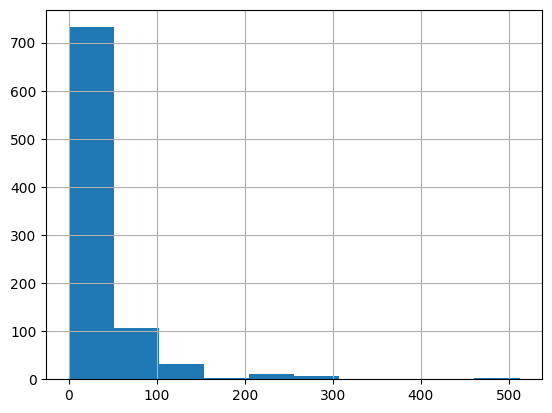

In [137]:
df["Fare"].hist()

**aykırı degerlerden kurtulmak ıcın logarıtmık yontemı kullandık.**

<Axes: >

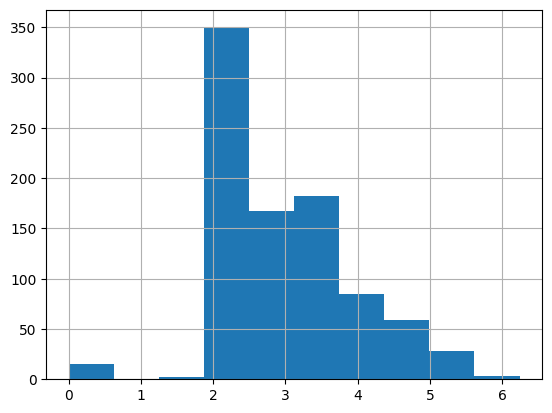

In [138]:
df["Fare"]=np.log(df["Fare"]+1)
df["Fare"].hist()

kategorik değişkenleri numerik yaptık

In [139]:
df = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"],dtype=int)
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [140]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1
3,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,0,1


**bagımlı degıskenlerımızı tensore atalım**

In [141]:
import torch
from torch import tensor

t_dep = tensor(df.Survived)
t_dep

tensor([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,

**bagımsız degıskenlerımızı tensore atalım**

In [142]:
indep_cols = ['Age', 'SibSp', 'Parch', 'Fare'] + added_cols

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]])

**bagımsız degısken tensorlerımızın seklıne bakalım ve 12 tane sutunlu oldugundan demekkı bunlarla carpılacak katsayıların sayısıda 12 tane olmalıdır.**

In [143]:
t_indep.shape

torch.Size([891, 12])

**gradient baslangıcı ıcın bır tamamen rasgele 12 tane elemandan olusan bır vektor yaptık**

In [144]:
random_numbers_01 = torch.rand(12)
katsayılar = (random_numbers_01 - 0.5) 
katsayılar

tensor([ 0.0110,  0.2525, -0.0495, -0.1576,  0.1493, -0.1354,  0.1976, -0.1464,
        -0.4726,  0.4072,  0.4901, -0.0186])

**bu sekılde pytorch ıle bır normlızasyon yaptık cunku Age bır aykırı deger olarak davranıyordu.**

In [145]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals
t_indep

tensor([[0.2750, 0.1250, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.4750, 0.1250, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.3250, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        ...,
        [0.3000, 0.1250, 0.3333,  ..., 0.0000, 0.0000, 1.0000],
        [0.3250, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.4000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000]])

**katsayılarımı bagımsız degıskenler ıle dolu tensorumuzle carpalım
**

In [146]:
katsayılar*t_indep

tensor([[ 0.0030,  0.0316, -0.0000,  ...,  0.0000,  0.0000, -0.0186],
        [ 0.0052,  0.0316, -0.0000,  ...,  0.4072,  0.0000, -0.0000],
        [ 0.0036,  0.0000, -0.0000,  ...,  0.0000,  0.0000, -0.0186],
        ...,
        [ 0.0033,  0.0316, -0.0165,  ...,  0.0000,  0.0000, -0.0186],
        [ 0.0036,  0.0000, -0.0000,  ...,  0.4072,  0.0000, -0.0000],
        [ 0.0044,  0.0000, -0.0000,  ...,  0.0000,  0.4901, -0.0000]])

**sum() burada carpım sonucu olan tensordekı her satırı tek tek toplar ve bu bızım ıcın 891 tane tahmın degerı olur.**

In [147]:
preds = (t_indep*katsayılar).sum(axis=1)
len(preds)

891

In [148]:
preds

tensor([-0.3606,  0.3980, -0.6784, -0.0208, -0.3927,  0.1134,  0.2356, -0.3333,
        -0.7025,  0.0720, -0.6754, -0.0322, -0.3948, -0.4339, -0.6798, -0.3645,
         0.1992, -0.0791, -0.6652, -0.2508, -0.0941, -0.0777, -0.1714,  0.2413,
        -0.6173, -0.7189,  0.0340,  0.2683, -0.1697, -0.3938,  0.6748,  0.3781,
        -0.1694, -0.0683,  0.6779,  0.2654,  0.0340, -0.3946, -0.6354, -0.2306,
        -0.6489, -0.3433,  0.0320,  0.0460, -0.1704, -0.3942,  0.1310, -0.1694,
         0.0715, -0.6667, -0.3165, -0.3939,  0.3977, -0.3482,  0.6502,  0.2408,
        -0.3593,  0.0346, -0.3696, -0.2967,  0.0337, -0.0622,  0.2541, -0.3481,
         0.6726,  0.0401, -0.3582, -0.3952, -0.5698, -0.3324, -0.0730, -0.5808,
        -0.1217,  0.0499, -0.4398, -0.3929, -0.3938, -0.3942, -0.1180, -0.6882,
        -0.3970, -0.3973, -0.1695,  0.2344, -0.3598, -0.5987, -0.4229, -0.3942,
        -0.0159, -0.3942, -0.3935, -0.3942,  0.2619, -0.4008, -0.3870, -0.3942,
         0.6737,  0.6439, -0.3843, -0.06

In [149]:
loss=torch.abs(t_indep-preds).mean()
loss

RuntimeError: The size of tensor a (12) must match the size of tensor b (891) at non-singleton dimension 1